## Evaluating a machine learning model
### There are 3 ways to evaluate Scikit-Learn models/esitmators:

1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions.

 Evaluating a model with the score method 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


 https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html




In [5]:
heart_disease = pd.read_csv('./heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The inter-dependency b/w two categorical variable, extension of normal distribtion-> taking the square of any point of normal distribution gives chi-square distribution -> increase in degree of freedom increase in curveness -> Chi square test

min. reqd. of variables/properties through which we analyze other variable, correlation -> degree of freedom

contigancy table -> x:y=1:15 (rato..frequency) (for categorical data) -> to make a  relation or find frequency b/w data

bionomial distribution -> summation(observe - expected)^2 / (expected) -> expected value is generated from contigany table through mean usually.

we can calculate 3rd var. from prevous two variables - degree of freedom.

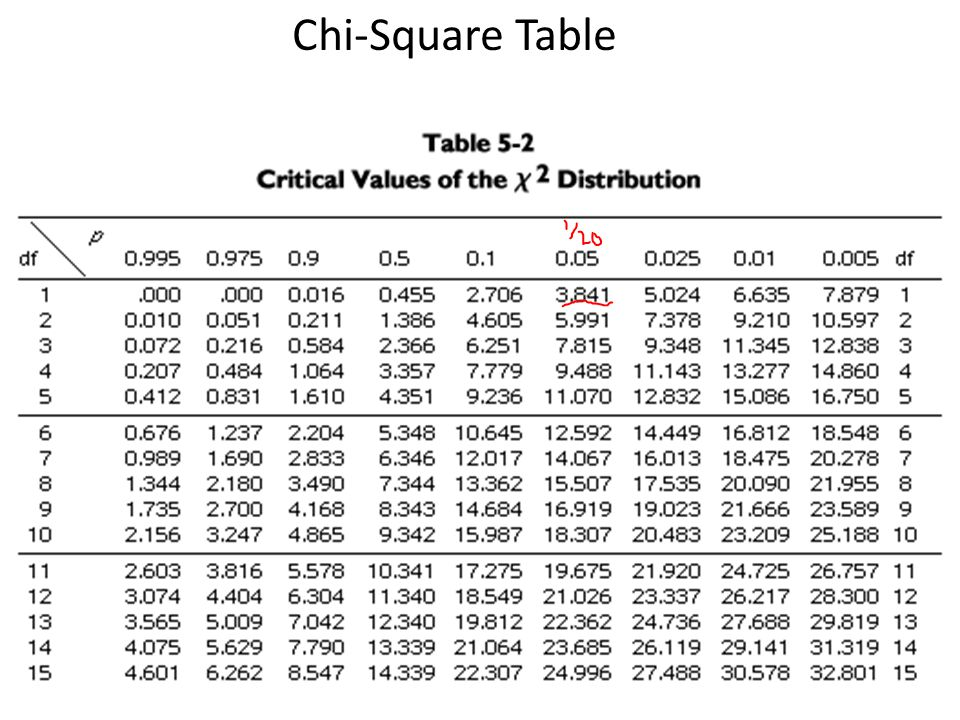


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Size of training set:", X_train.shape)
print("Size of training set:", X_test.shape)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

Size of training set: (212, 13)
Size of training set: (91, 13)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)
# Return the mean accuracy on the given test data and labels

0.8241758241758241

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

in terms of regression

In [12]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [14]:
model.score(X_test, y_test)

0.8797770038888664

In [15]:
model.score(X_train, y_train)
# Return the coefficient of determination R^2 of the prediction.

0.9784055836231608

Evaluating a model using the scoring parameter

In [16]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In five fold cross validation, 5 diffeent versions of data is trained variously 5 each time 

Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [18]:
# 1
np.mean(cross_val_score(clf, X, y, cv=5))

0.8183606557377049

In [19]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score(clf, X, y, cv=5)) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.83%


**Area under the receiver operating characteristic curve (AUC/ROC)**

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).


1. True positive = model predicts 1 when truth is 1
2. False positive = model predicts 1 when truth is 0
3. True negative = model predicts 0 when truth is 0
4. False negative = model predicts 0 when truth is 1


In [20]:
from sklearn.metrics import roc_curve

probs = clf.predict_proba(X_test)
probs[:10], len(probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]), 61)

In [21]:
# prob [of 0, of 1]

In [22]:
probs_pos = probs[:, 1]
probs_pos[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [23]:
fpr, tpr, threshold = roc_curve(y_test, probs_pos)

In [24]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [25]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [26]:
threshold

array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

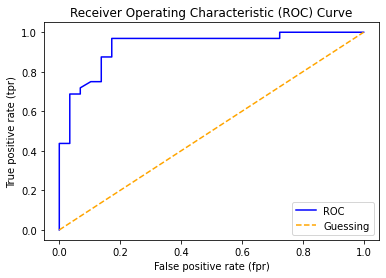

In [27]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    plt.plot(fpr, tpr, color="blue", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="orange", linestyle="--", label="Guessing")
 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, probs_pos)

0.9304956896551724

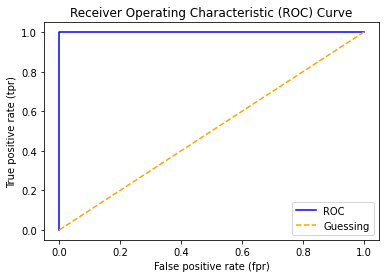

Perfect AUC Score:  1.0


In [29]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

print("Perfect AUC Score: " , roc_auc_score(y_test, y_test))


**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In [30]:
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_test)

print(confusion_matrix(y_test, pred))

[[24  5]
 [ 4 28]]


In [31]:
pd.crosstab(y_test, pred,rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [32]:
print(24+28+5+4)
print(len(pred))
print(len(X_test))

61
61
61


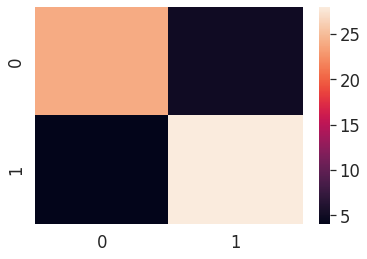

In [33]:
sns.set(font_scale=1.5)
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix)

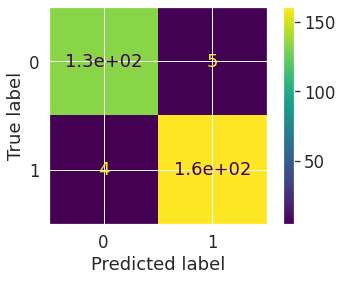

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [36]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000



* **F1-score** is comb. of recall and precision
*   If all classes are balanced( same no. of samples with 1 or 0 ) then  ->  **Accuracy**
* When classes are not imbalanced -> **Precision** and **recall**
* if false +ve are worse than false -ve -> **higher precision**
* if false -ve are worse than false +ve -> **higher recall**
   




**Regression model evaluation metrics**

* R^2 (pronounced r-squared) or coefficient of determination.
* Mean absolute error (MAE)
* Mean squared error (MSE)

*What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.*

In [37]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
model.score(X_test, y_test)

0.873969014117403

In [39]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [40]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [41]:
y_test.mean()

21.488235294117654

In [42]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [43]:
r2_score(y_test, y_test)


1.0

MAE is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [44]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae     = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [45]:
df = pd.DataFrame(data={'actual values': y_test, 'predicted values': y_preds})

df['diff'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,diff
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [46]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

using the scoring parameter

In [47]:
# cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

# print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

# cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
# np.mean(cv_precision)
        
# cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
# np.mean(cv_recall) 

# cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
# np.mean(cv_f1)

Classification evaluation functions

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 82.00%
Precision: 0.8571428571428571
Recall: 0.8275862068965517
F1: 0.8421052631578947


Regression evaluation functions



In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_preds))}")

Regression model metrics on the test set
R^2: 0.8797770038888664
MAE: 2.0881644736842104
MSE: 8.95818759868421
RMSE: 2.9930231537166914


Improving a model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

1. Could we collect more data? (generally, the more data, the better)
2. Could we improve our data?

From a model perspective:

1. Is there a better model we could use?
2. Could we improve the current model?

Hyperparameters vs. Parameters

1. Parameters = model find these patterns in data
2. Hyperparameters = settings on a model you can    adjust to (potentially) improve its ability to find  patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [50]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimator=100)

In [51]:
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
dlf = RandomForestClassifier()

In [52]:
dlf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Tuning hyperparameters by hand </br>
Let's make 3 sets, training, validation and test.

We're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [53]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2), "precision": round(precision, 2), "recall": round(recall, 2), "f1": round(f1, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [54]:
# from sklearn.model_selection import RandomizedSearchCV

# grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
#         "max_depth": [None, 5, 10, 20, 30],
#         "max_features": ["auto", "sqrt"],
#         "min_samples_split": [2, 4, 6],
#         "min_samples_leaf": [1, 2, 4]}

# np.random.seed(42)

# # Split into X & y
# X = heart_disease_shuffled.drop("target", axis=1)
# y = heart_disease_shuffled["target"]

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate RandomForestClassifier
# clf = RandomForestClassifier(n_jobs=1)

# # Setup RandomizedSearchCV
# rs_clf = RandomizedSearchCV(estimator=clf,
#                             param_distributions=grid, 
#                             n_iter=10, # number of models to try
#                             cv=5,
#                             verbose=2)

# # Fit the RandomizedSearchCV version of clf
# rs_clf.fit(X_train, y_train);

In [55]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [56]:
# from sklearn.model_selection import GridSearchCV, train_test_split

# np.random.seed(42)

# # Split into X & y
# X = heart_disease_shuffled.drop("target", axis=1)
# y = heart_disease_shuffled["target"]

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # # Instantiate RandomForestClassifier
# # clf = RandomForestClassifier(n_jobs=1)

# # # Setup GridSearchCV
# # gs_clf = GridSearchCV(estimator=clf,
# #                       param_grid=grid_2, 
# #                       cv=5,
# #                       verbose=2)

# # Fit the GridSearchCV version of clf
# #gs_clf.fit(X_train, y_train);

In [57]:
# compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
#                                 "clf_2": clf_2_metrics,
#                                 "random search": rs_metrics,
#                                 "grid search": gs_metrics})

# compare_metrics.plot.bar(figsize=(10, 8));


Saving and loading trained machine learning models

There are two ways to save and load machine learning models:

1. With Python's pickle module
2. With the joblib module

In [58]:
import pickle

# Save an extisting model to file
"""
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))
"""
"""
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))
"""
"""
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)
"""

'\n# Make some predictions\npickle_y_preds = loaded_pickle_model.predict(X_test)\nevaluate_preds(y_test, pickle_y_preds)\n'

In [59]:
from joblib import dump, load

"""
# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")
"""
"""
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")
"""
"""
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)
"""

'\n# Make and evaluate joblib predictions\njoblib_y_preds = loaded_joblib_model.predict(X_test)\nevaluate_preds(y_test, joblib_y_preds)\n'

In [60]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [62]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [63]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

* all data should be numerical
* there should be no missing values
* manipulate test and training set as same
* dont test on _trained_ data
* tune hyperp-parameters on validation set or use cross validation
* one best performance model does not mean best perform metric

In [64]:
# Fill missing data
# Convert data to numbers
# Build a model on the data

In [65]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [66]:
# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [67]:
# Setup random seed
import numpy as np
np.random.seed(42)


In [68]:
# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

In [69]:
# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

In [70]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

In [71]:
# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

In [72]:
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2323456655743631

In [74]:
# we can use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [75]:
gs_model.score(X_test, y_test)

0.37718257415841294